In [47]:
gh = read.table( 'jteague6_github_truncated' )
bb = read.table( 'jteague6_bitbucket_truncated' )

colnames( gh ) = c( 'Desc_Length', 'Years_Since_Last_Update' )
colnames( bb ) = c( 'Desc_Length', 'Years_Since_Last_Update' )

print( 'Github' )
summary( gh )
print( 'BitBucket' )
summary( bb )

[1] "Github"


  Desc_Length       Years_Since_Last_Update
 Min.   :    1.00   Min.   :0.9316         
 1st Qu.:    1.00   1st Qu.:1.4411         
 Median :   22.00   Median :1.8219         
 Mean   :   35.59   Mean   :1.8782         
 3rd Qu.:   46.00   3rd Qu.:2.2821         
 Max.   :42915.00   Max.   :3.3093         

[1] "BitBucket"


  Desc_Length       Years_Since_Last_Update
 Min.   :     1.0   Min.   :0.1345         
 1st Qu.:    28.0   1st Qu.:3.3533         
 Median :    51.0   Median :3.3588         
 Mean   :   118.1   Mean   :3.3005         
 3rd Qu.:    92.0   3rd Qu.:3.3615         
 Max.   :893517.0   Max.   :4.1559         

Looks like we have a fantastic spread here. However, this information doesn't tell us a whole lot. Let's do some analysis.

[1] "Github"
[1] "BitBucket"


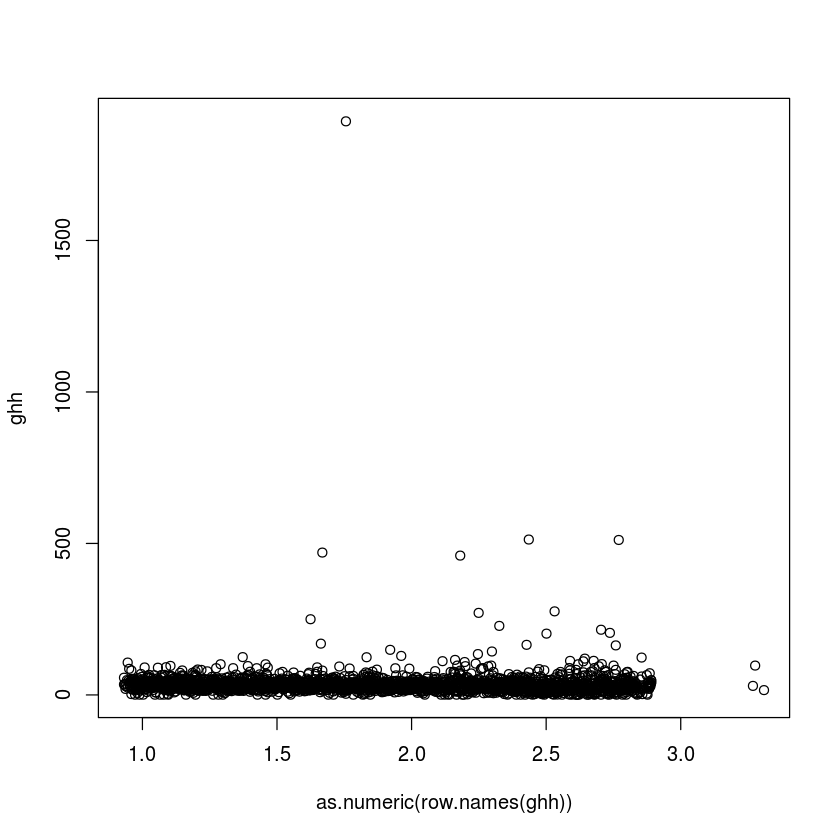

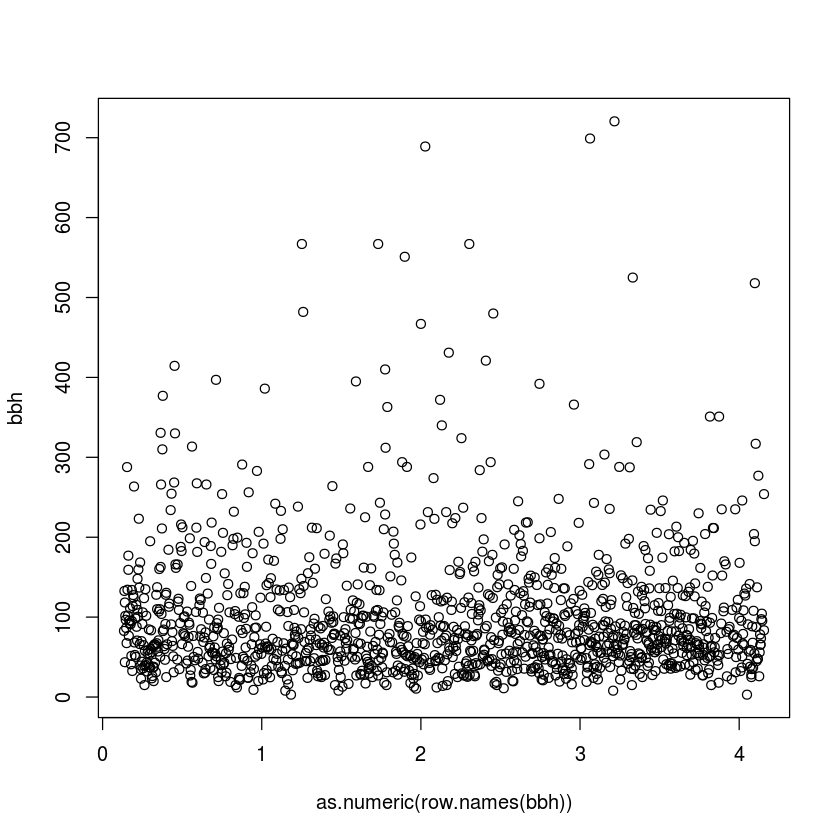

In [48]:
#print( bb$Desc_Length )
# Convert seconds to years. Not sure why I didn't just do that in Python
ghh = tapply( gh$Desc_Length, gh$Years_Since_Last_Update, mean )
bbh = tapply( bb$Desc_Length, bb$Years_Since_Last_Update, mean )
print( 'Github' )
plot(as.numeric(row.names(ghh)),ghh)
print( 'BitBucket' )
plot(as.numeric(row.names(bbh)),bbh)


Well, it doesn't look like there's much correlation there. There are plenty of projects that have been updated recently that have short (or no) descriptions, and plenty of projects thatLet's see if we can get anything else out of this data.

In [49]:
print( 'Github' )
cor(gh[,c('Desc_Length','Years_Since_Last_Update')],method="spearman")
print( 'BitBucket' )
cor(bb[,c('Desc_Length','Years_Since_Last_Update')],method="spearman")

[1] "Github"


Desc_Length Years_Since_Last_Update
Desc_Length              1.00000000             -0.05477876
Years_Since_Last_Update -0.05477876              1.00000000

[1] "BitBucket"


Desc_Length Years_Since_Last_Update
Desc_Length              1.00000000             -0.01932251
Years_Since_Last_Update -0.01932251              1.00000000

We don't seem to have much of a correlation here, still.

In [50]:
# Normalize words
#gh$ldescn = (gh$Desc_Length / 42915.00 )
gh$lyears = log( gh$Years_Since_Last_Update )
gh$ldesc = log( gh$Desc_Length )
bb$lyears = log( bb$Years_Since_Last_Update )
bb$ldesc = log( bb$Desc_Length )

# I have no idea why the following two lines don't work, and it bothers me that they don't. I get the following error: 
# Error in eval(expr, envir, enclos): y values must be 0 <= y <= 1. Uncomment the following two lines to see it.
# Because of this, I'm using regular cor() to look at logarithmic correlations at the advice of a classmate.
#fmla = lyears ~ ldesc
#ghm <- glm( fmla, family=binomial, data=gh )
#summary( mod )

print( 'Github' )
cor(gh[,c('ldesc', 'lyears')], method="spearman")
print( 'BitBucket' )
cor(bb[,c('ldesc', 'lyears')], method="spearman")

[1] "Github"


ldesc      lyears
ldesc   1.00000000 -0.05477876
lyears -0.05477876  1.00000000

[1] "BitBucket"


ldesc      lyears
ldesc   1.00000000 -0.01932251
lyears -0.01932251  1.00000000

That's exactly the same as above, although I probably shouldn't be too surprised giving what logarithms actually do. What do the histograms look like?

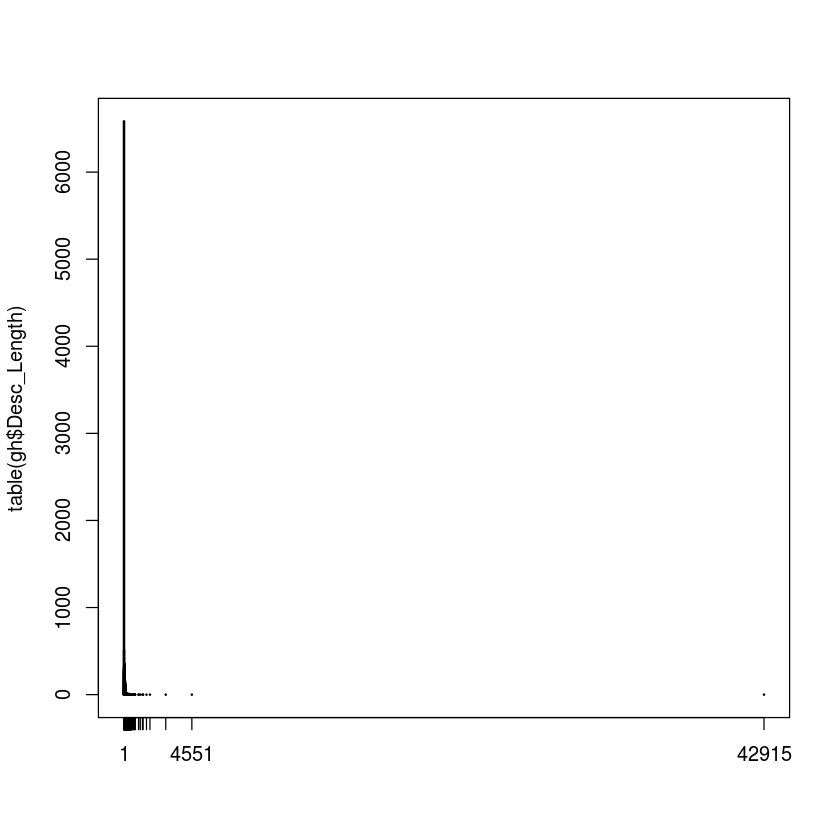

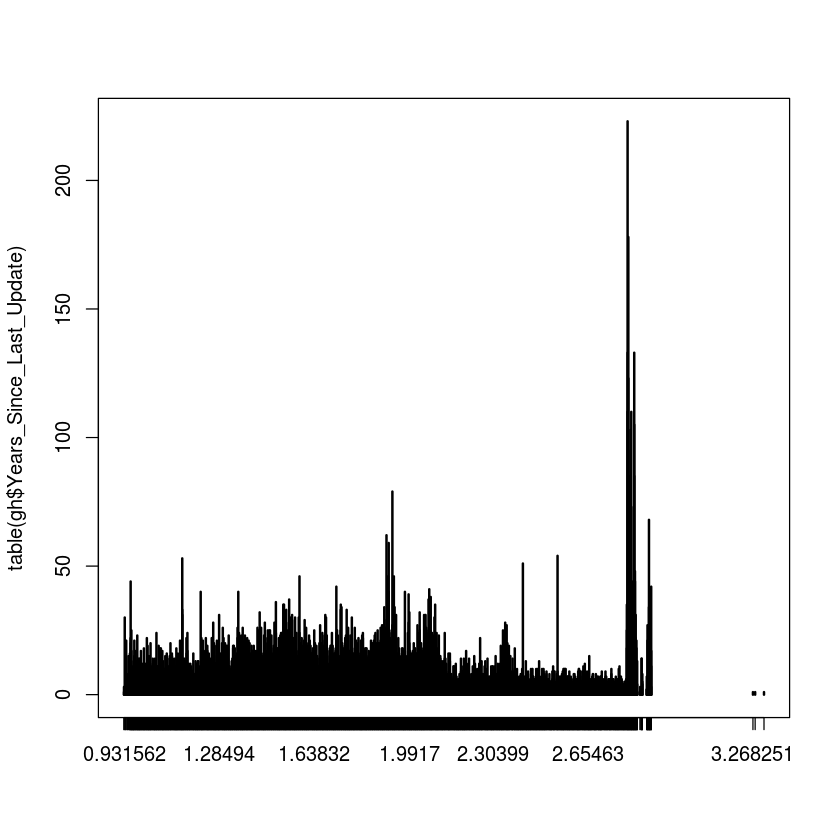

In [51]:
# For github
plot( table( gh$Desc_Length ) )
plot(table( gh$Years_Since_Last_Update) )

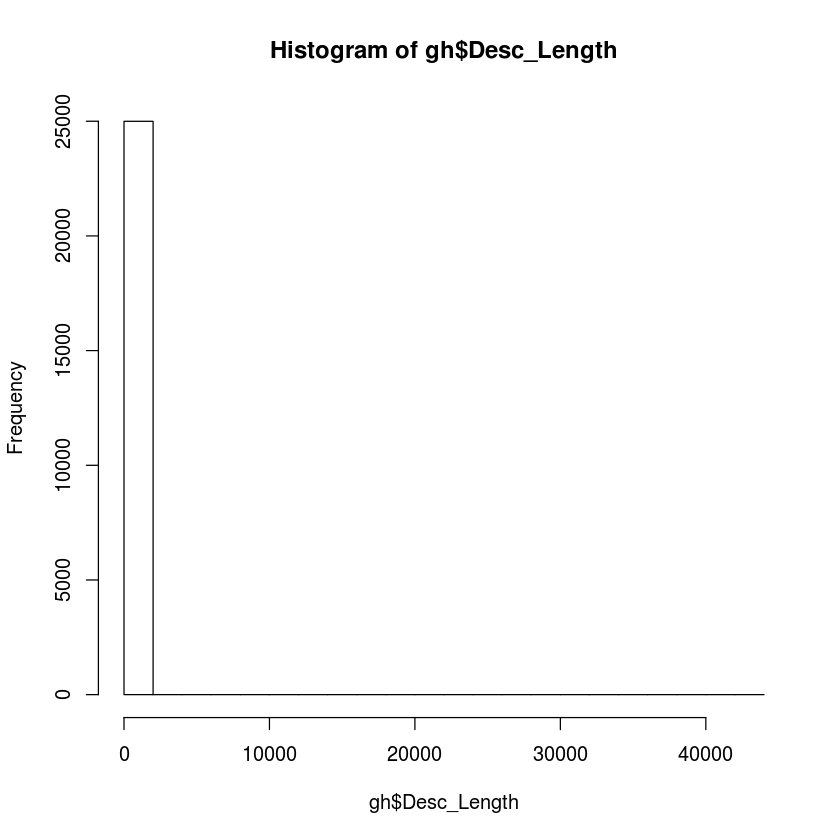

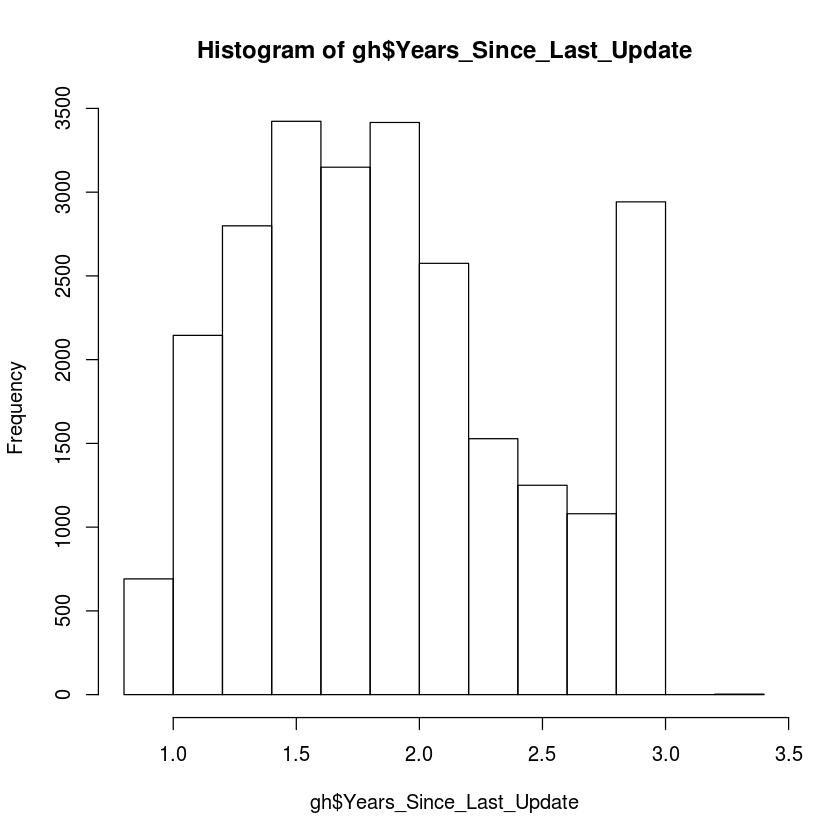

In [52]:
# For github
hist(gh$Desc_Length)
hist(gh$Years_Since_Last_Update)

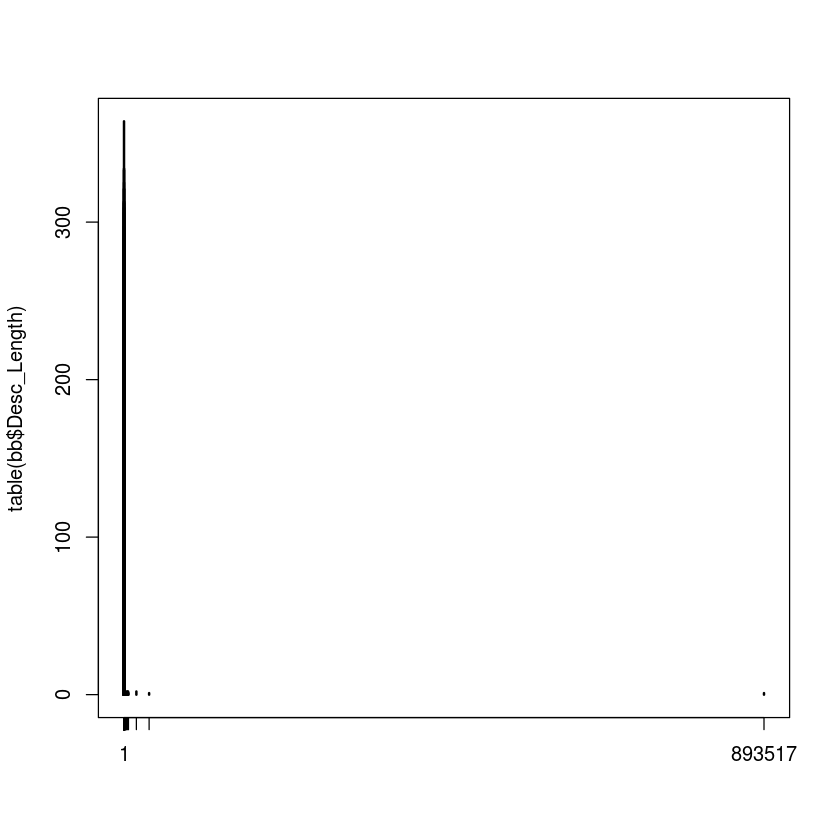

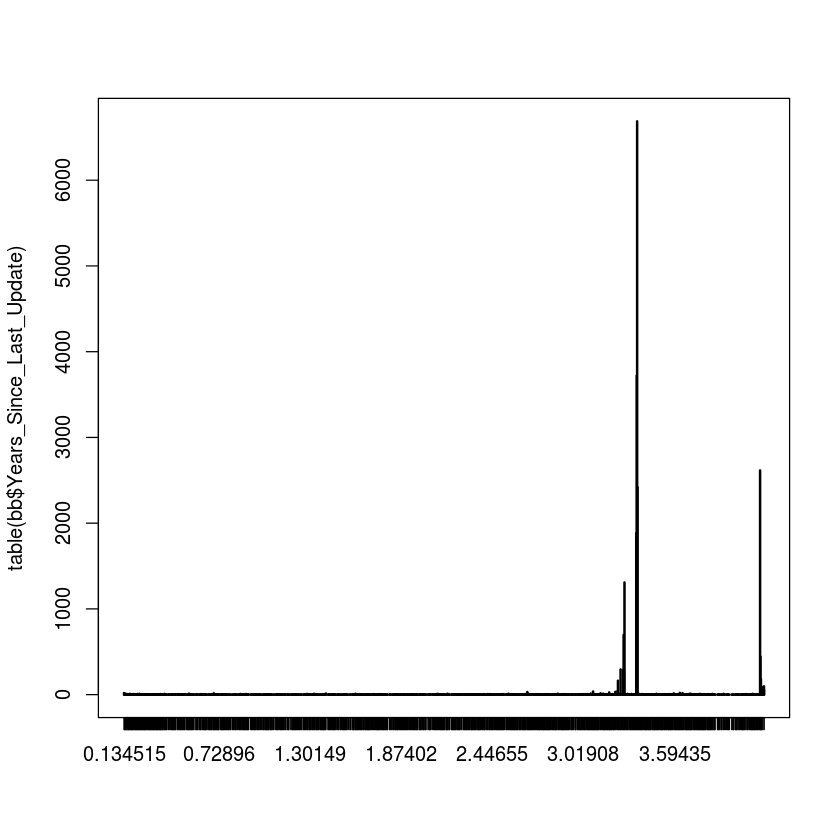

In [53]:
# For bb
plot( table( bb$Desc_Length) )
plot( table( bb$Years_Since_Last_Update) )

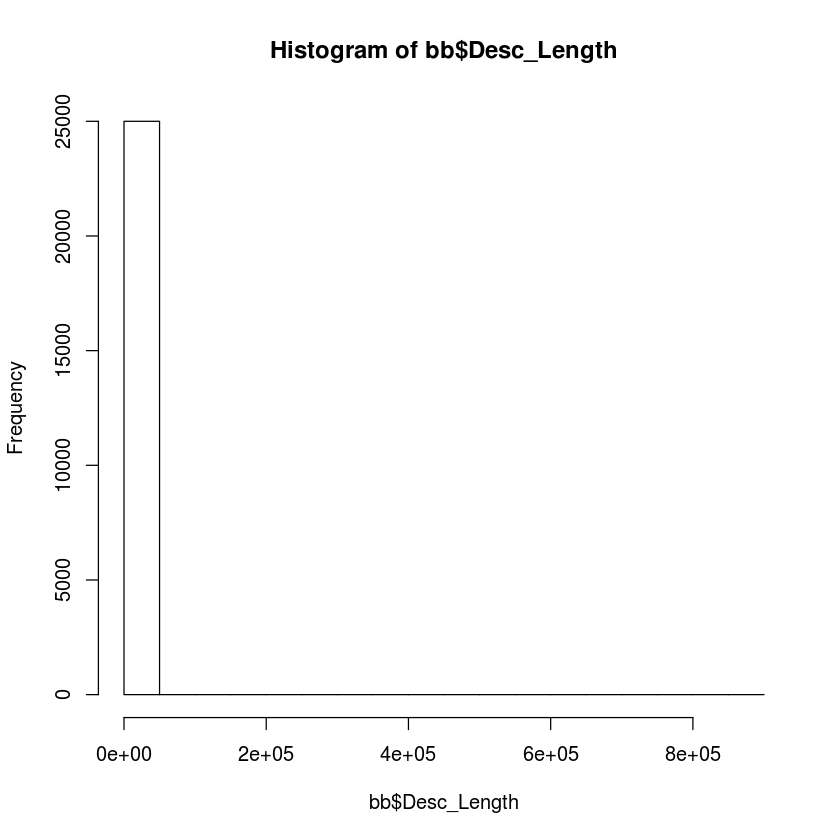

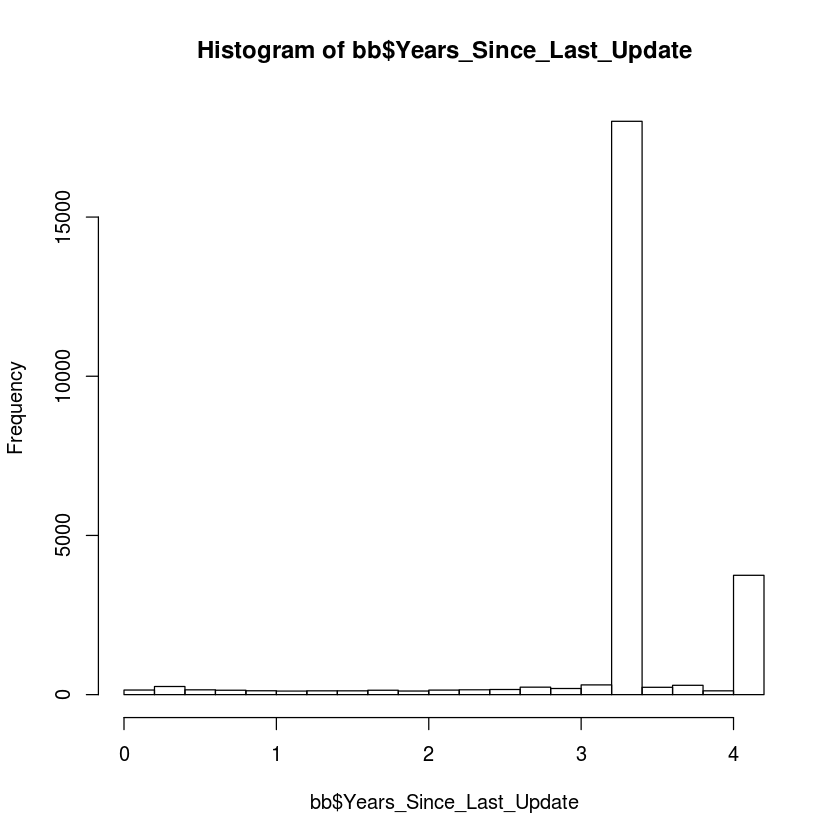

In [54]:
# For bb
hist(bb$Desc_Length)
hist(bb$Years_Since_Last_Update)

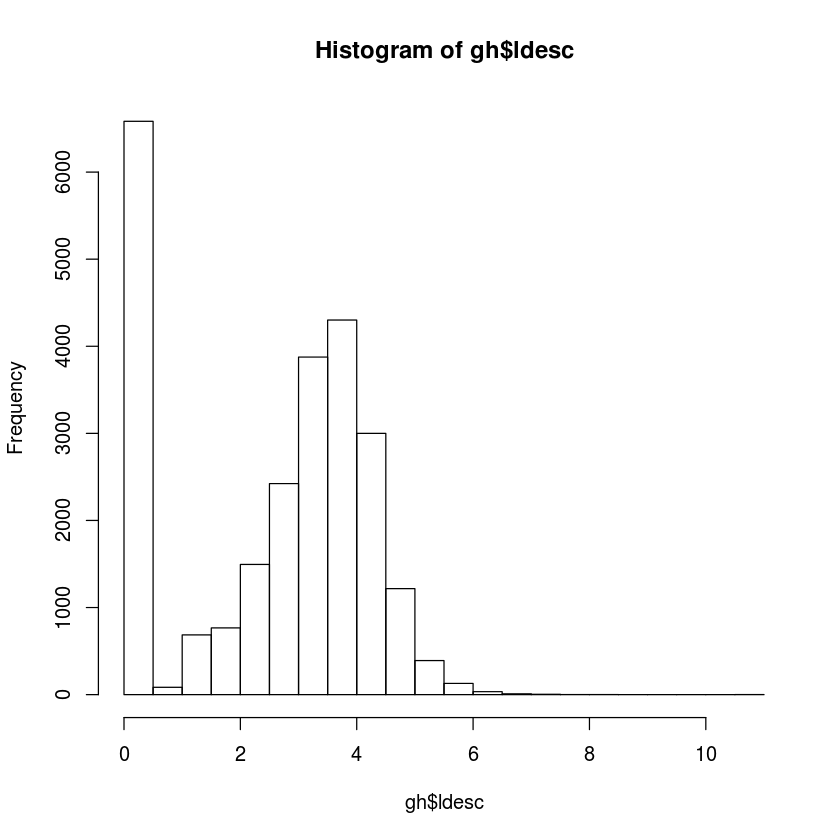

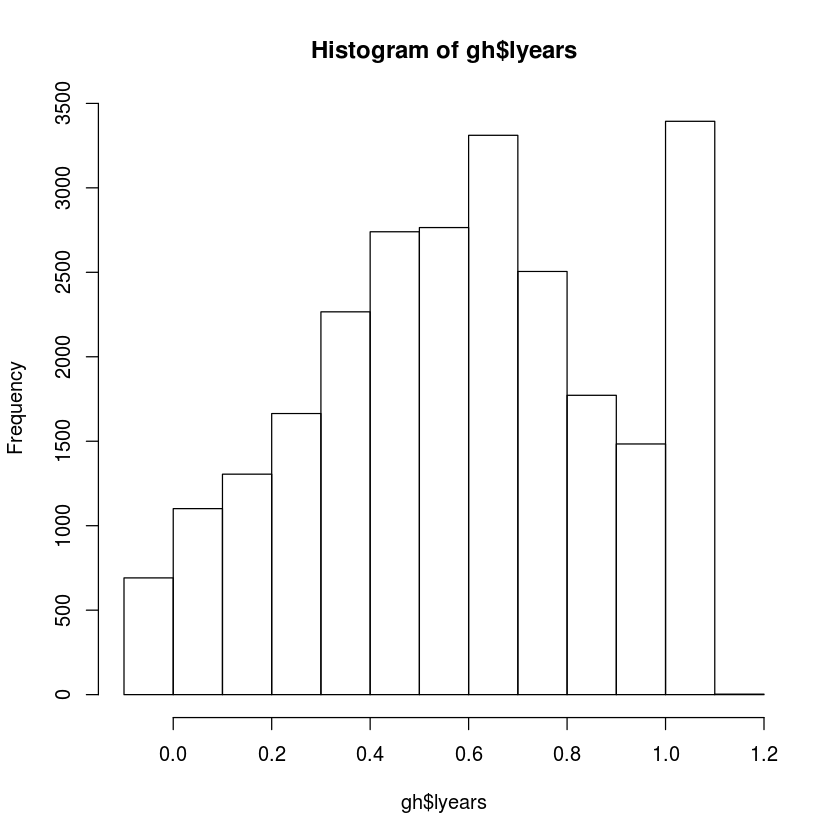

In [55]:
# Maybe looking at the log versions of those will help, since this is practically unreadable
# For gh
hist(gh$ldesc)
hist(gh$lyears)

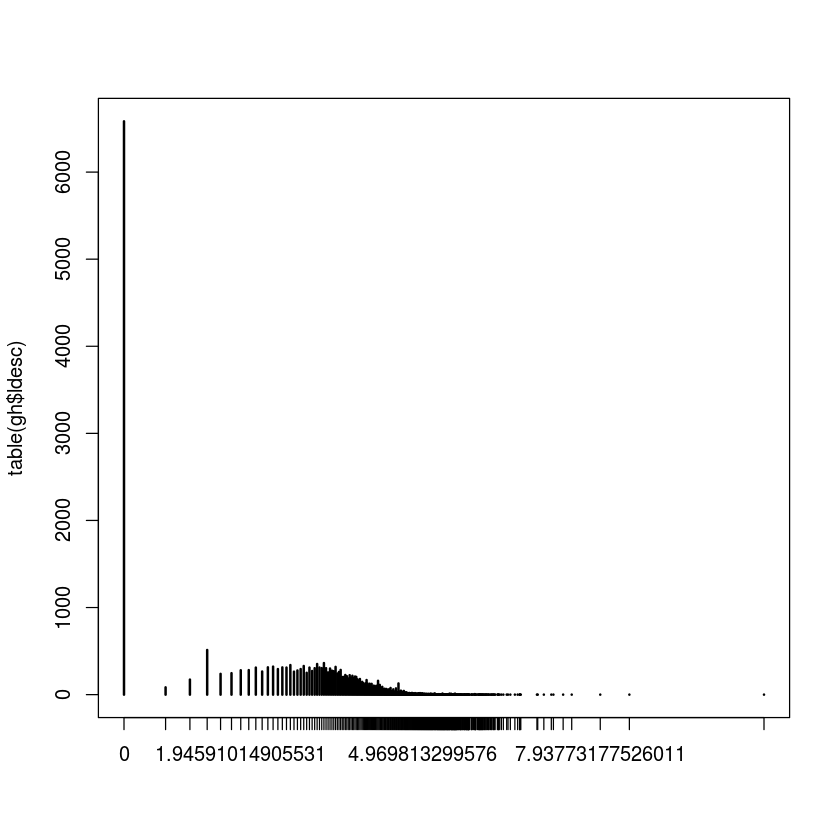

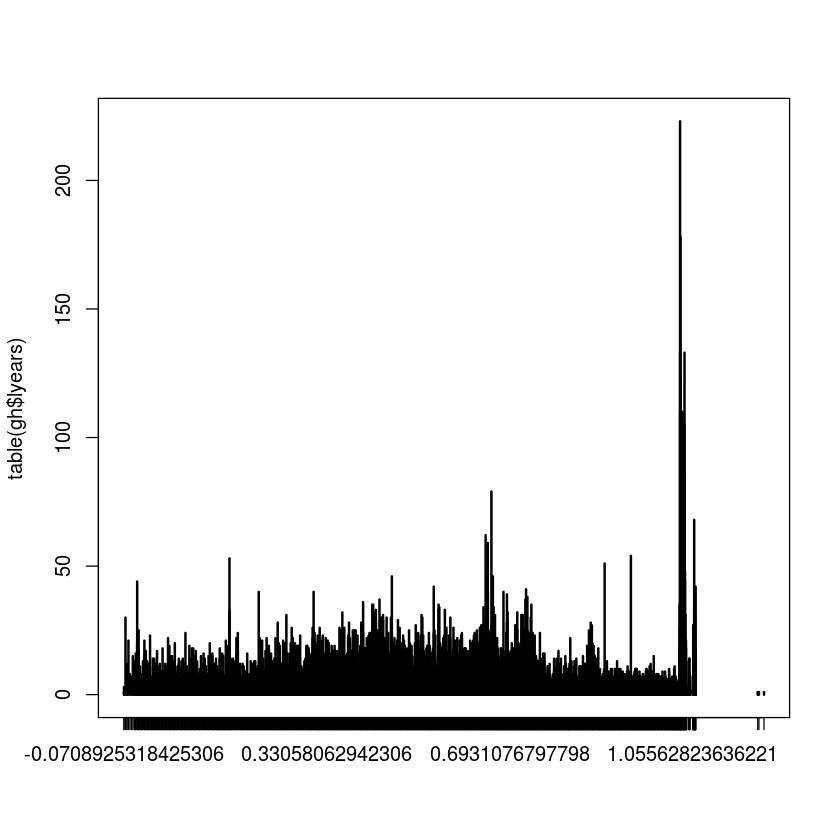

In [56]:
# For gh
plot(table(gh$ldesc))
plot(table(gh$lyears))

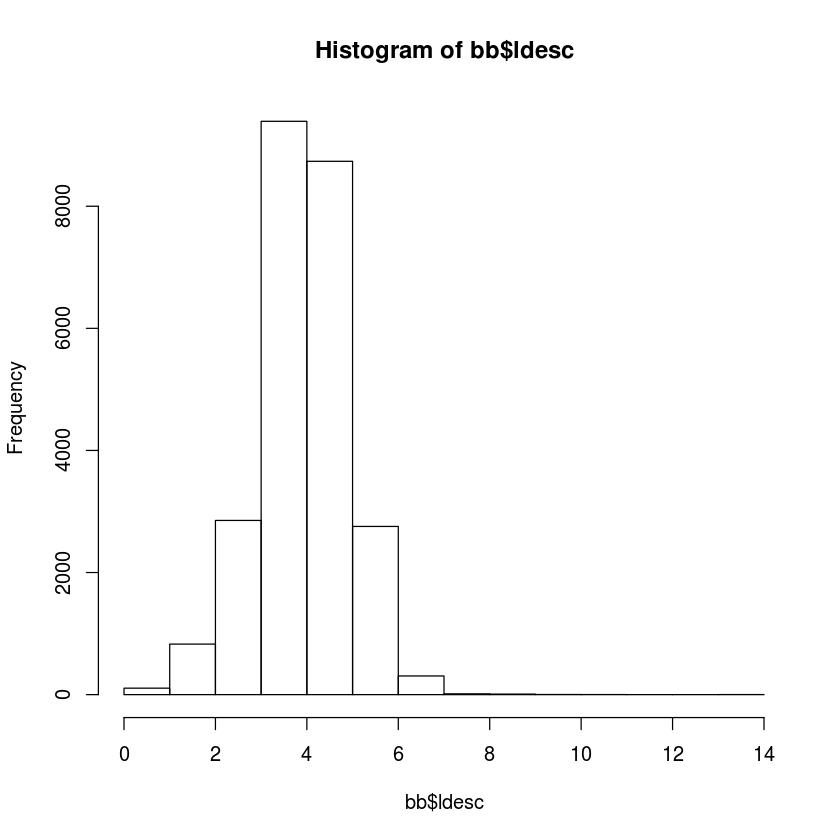

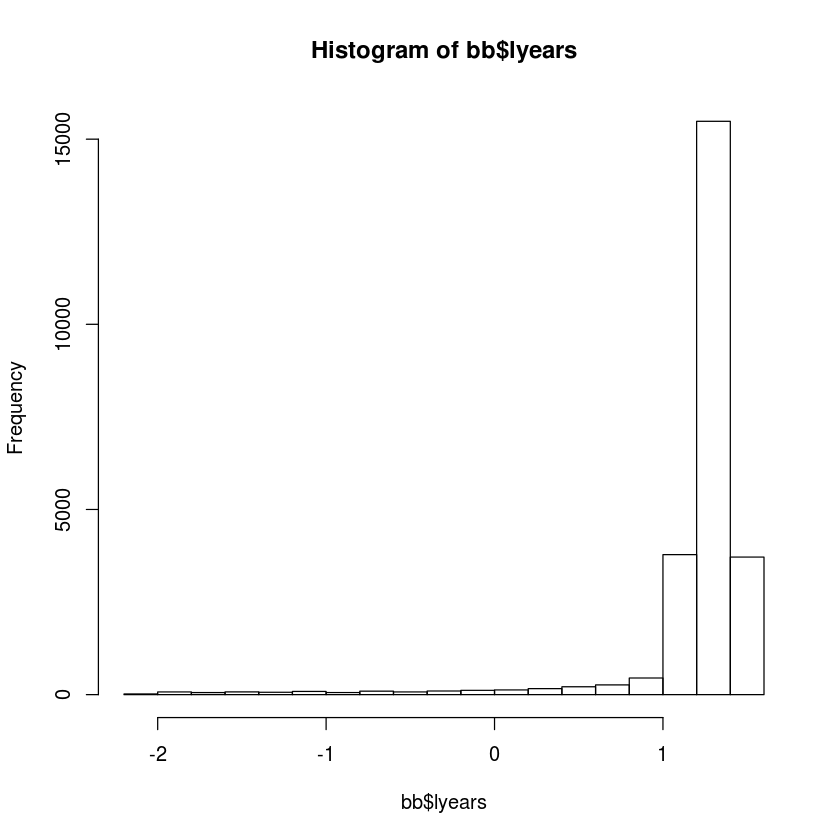

In [57]:
# Maybe looking at the log versions of those will help, since this is practically unreadable
# For bb
hist(bb$ldesc)
hist(bb$lyears)

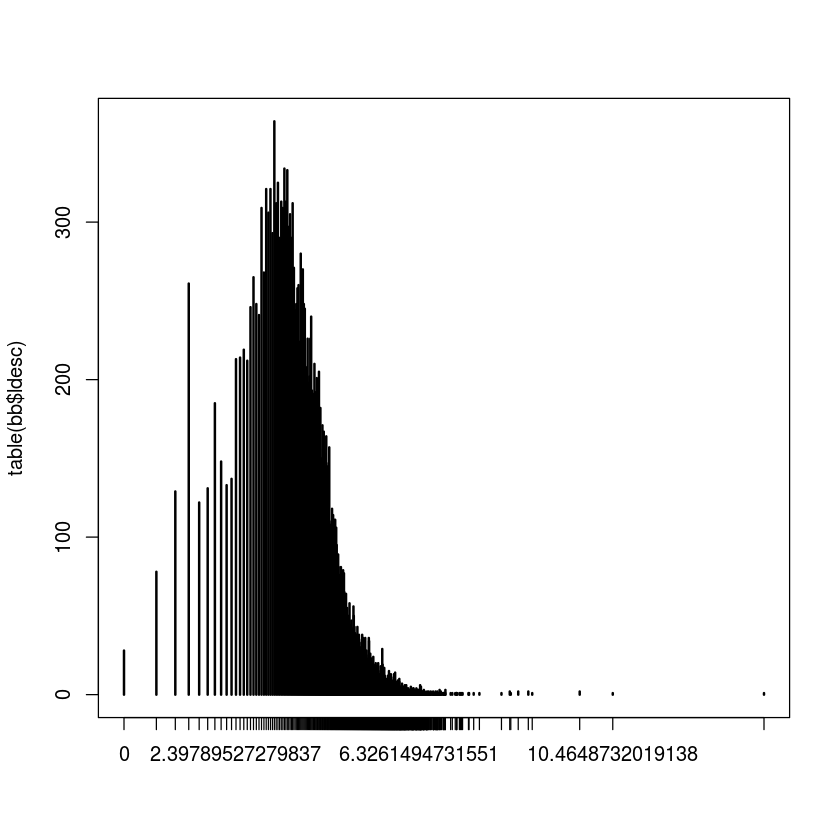

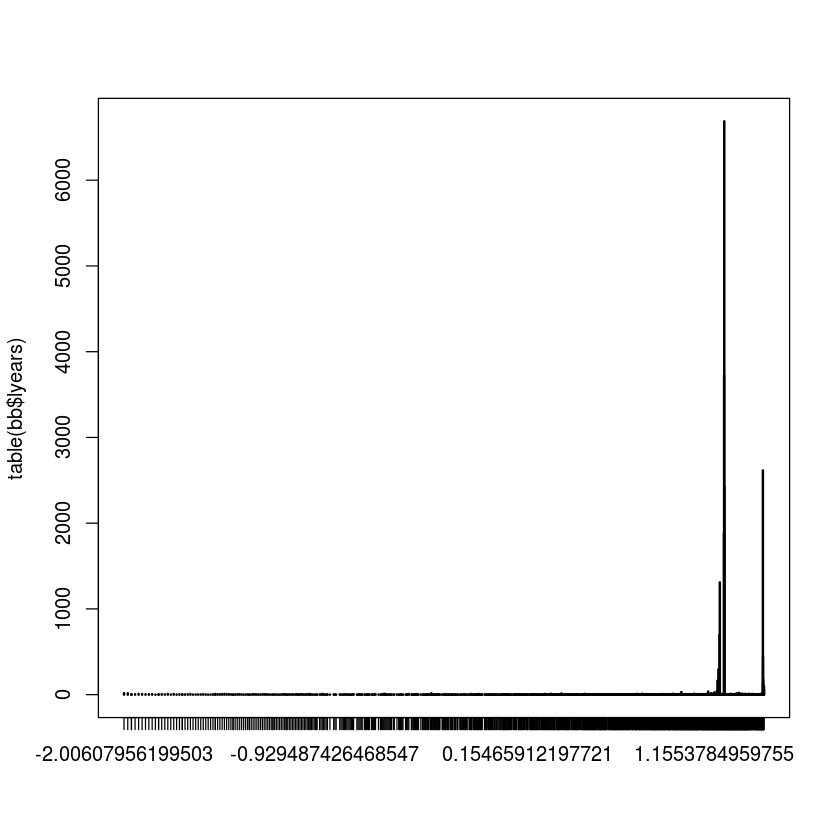

In [58]:
# For bb
plot(table(bb$ldesc))
plot(table(bb$lyears))

In [72]:
# That may be a bit more sensible. Let's try to make a model, finally:
# Thank you Dr. Mockus for your great presentation that helped me with this
# I had to do some questionable things here to normalize this - values must be between -1 and 1 for the model to work
# For consistency, I'm going to make them all between 0 and 1 with a little bit of massaging.
m = min( bb$lyears )
bb$nyears = bb$lyears - m
m = max( bb$nyears )
bb$nyears = bb$nyears / m
print( min( bb$nyears ) )
print( max( bb$nyears ) )

# Normalize bitbucket description length. Fortunately, the min here is already 0 so there's less trickery needed
m = max( bb$ldesc )
bb$ndesc = bb$ldesc / m
print( min( bb$ndesc ) )
print( max( bb$ndesc ) )
fmla = bb$nyears ~ bb$ndesc
mod <- glm( fmla, family=quasibinomial, data=bb )
# Use of quasibinomial to suppress warning

[1] 0
[1] 1
[1] 0
[1] 1


In [70]:
## Final findings to bitbucket:
summary( mod )
anova( mod, text="Chi" )


Call:
glm(formula = fmla, family = quasibinomial, data = bb)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.29032   0.04664   0.07489   0.10720   0.56245  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.84645    0.04378   65.02   <2e-16 ***
bb$ndesc    -1.52035    0.14569  -10.44   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasibinomial family taken to be 0.2005598)

    Null deviance: 2946.8  on 25000  degrees of freedom
Residual deviance: 2924.8  on 24999  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 5


Warning message:
In anova.glm(mod, text = "Chi"): the following arguments to 'anova.glm' are invalid and dropped: structure(list(text = "Chi"), .Names = "text")

Analysis of Deviance Table

Model: quasibinomial, link: logit

Response: bb$nyears

Terms added sequentially (first to last)


         Df Deviance Resid. Df Resid. Dev
NULL                     25000     2946.8
bb$ndesc  1    21.95     24999     2924.8

In [73]:
# Normalize and do the same thing for GitHub
m = min( gh$lyears )
gh$nyears = gh$lyears - m
m = max( gh$nyears )
gh$nyears = gh$nyears / m
print( min( gh$nyears ) )
print( max( gh$nyears ) )

# Normalize bitbucket description length. Fortunately, the min here is already 0 so there's less trickery needed
m = max( gh$ldesc )
gh$ndesc = gh$ldesc / m
print( min( gh$ndesc ) )
print( max( gh$ndesc ) )
fmla = gh$nyears ~ gh$ndesc
mod <- glm( fmla, family=quasibinomial, data=gh )
# Use of quasibinomial to suppress warning

[1] 0
[1] 1
[1] 0
[1] 1


In [74]:
## Final findings to GitHub:
summary( mod )
anova( mod, text="Chi" )


Call:
glm(formula = fmla, family = quasibinomial, data = gh)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.23462  -0.34729   0.02423   0.38600   1.15006  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.13357    0.01082  12.346  < 2e-16 ***
gh$ndesc    -0.26499    0.03799  -6.974 3.15e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasibinomial family taken to be 0.2286089)

    Null deviance: 6370.6  on 25000  degrees of freedom
Residual deviance: 6359.5  on 24999  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 3


Warning message:
In anova.glm(mod, text = "Chi"): the following arguments to 'anova.glm' are invalid and dropped: structure(list(text = "Chi"), .Names = "text")

Analysis of Deviance Table

Model: quasibinomial, link: logit

Response: gh$nyears

Terms added sequentially (first to last)


         Df Deviance Resid. Df Resid. Dev
NULL                     25000     6370.6
gh$ndesc  1   11.127     24999     6359.5

# Conclusion

There is no significant correlation between the length of a repository's description and how active it is in Github or BitBucket. Some projects that are updated regularly have no descriptions and some projects that have been dead for years have long descriptions. It is worth noting that MOST projects have little-to-no description: for both sites, the 3rd quartile for description length was under 100 characters, despite the max being well into the thousands.

## Possible Reasons for This
1. Maybe some of those long-dead projects with long descriptions are finished. For example, you have a succesful repo for some Windows 7 package and then a new version of Windows renders it obsolete. In that case, your project would appear dead in this analysis despite the fact that it was quite successful in its prime. Note that this is a hypotetical situation.
2. This one is more likely: the important information about the project is most likely in a readme. This analysis does nothing with the contents of the markdown files that each repo, at least in Github, typically has. From personal experience, this is where most project information seems to go. This analysis seems to confirm that: big, sucesful projects have to have lots of detail SOMEWHERE, and this confirms that it is clearly not in the project description at least 75% of the time.

## Future Ideas
1. Execute a much more complex scrape of these repos that actually analyzes the readmes and determines WHY a dead project is dead and HOW LONG the readmes are. I'm not sure it's appropriate to classify a project that has been completed as "dead" since it is still useful.
2. Make a third category because of the above: active projects, projects that died due to neglect before completion, and ( maybe) projects that were completed or intentionally abandoned for technical reasons.
3. If possible, try to distribute the final analysis. Not being able to look at the entirety of the repo sites was disappointing. Perhaps employ the Newton cluster to do some number crunching, if that's possible in R.

Overall this was an enjoyable assignment. I was disappointed that my hypothesis was not correct, but that's part of doing experiments. I have some good possible reasons and some ideas on how to proceed into the future if this project ever continues.